# Survey Analysis
How to use NLP to extract information from survey responses

## Libraries

In [21]:
# Default Libraries
import pandas as pd
import numpy as np
import string

# Plot Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Analysis Libraries
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# NLP Feature Extraction Libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Metrics Libraries
from sklearn import metrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Data
Dataset URL: https://www.kaggle.com/datasets/miroslavsabo/young-people-survey?resource=download

In [22]:
df = pd.read_csv('../data/raw/columns.csv')
df

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country
...,...,...
145,I am,Left - right handed
146,Highest education achieved,Education
147,I am the only child,Only child
148,I spent most of my childhood in a,Village - town


## NLP Feature Extraction

In [23]:
# Stopwords count
stop = set(stopwords.words('english'))

df['stopwords'] = df['original'].apply(lambda x: len([x for x in x.split() if x in stop]))

# Punctuations count
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

df['punctuation'] = df['original'].apply(lambda x: count_punct(x))

# Numerics char count
df['numerics'] = df['original'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

# Upper letters count
df['upper'] = df['original'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

# Words count
df['word_count'] = df['original'].apply(lambda x: len(str(x).split(" ")))

# Char count
df['char_count'] = df['original'].str.len() ## this also includes spaces

# Average count of letters in the words of the sentence
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+0.000001))

df['avg_word'] = df['original'].apply(lambda x: avg_word(x)).round(1)

In [24]:
df # DataFrame with new columns

,original,short,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word
0,I enjoy listening to music.,Music,1,1,0,1,5,27,4.6
1,I prefer.,Slow songs or fast songs,0,1,0,1,2,9,4.0
2,"Dance, Disco, Funk",Dance,0,2,0,0,3,18,5.3
3,Folk music,Folk,0,0,0,0,2,10,4.5
4,Country,Country,0,0,0,0,1,7,7.0
...,...,...,...,...,...,...,...,...,...
145,I am,Left - right handed,1,0,0,1,2,4,1.5
146,Highest education achieved,Education,0,0,0,0,3,26,8.0
147,I am the only child,Only child,3,0,0,1,5,19,3.0
148,I spent most of my childhood in a,Village - town,5,0,0,1,8,33,3.2


## NLP Analysis
Outputs:
1. Vader Sentiment
    1. negative
    2. neutral
    3. positive
    4. compound
2. TextBlob
    1. Polarity

In [66]:
df['negative'] = np.nan
df['neutral'] = np.nan
df['positive'] = np.nan
df['compound'] = np.nan
df['polarity'] = np.nan


for row in range(df.shape[0]):
    
    text = df.loc[row,'original']
    
    # Vader sentiment analysis
    
    sid_obj= SentimentIntensityAnalyzer()
    
    my_dict = sid_obj.polarity_scores(text)

    my_list = list(my_dict.values())
    
    df.loc[row,'negative'] = my_list[0]
    df.loc[row,'neutral'] = my_list[1]
    df.loc[row,'positive'] = my_list[2]
    df.loc[row,'compound'] = my_list[3]
    
    # TextBlob sentiment analysis
    
    res = TextBlob(text)
    polarity = res.sentiment.polarity
    df.loc[row,'polarity'] = polarity

In [67]:
df # DataFrame with sentiment analysis results

,original,short,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word,negative,neutral,positive,compound,polarity,vader_classification,textblob_classification
0,I enjoy listening to music.,Music,1,1,0,1,5,27,4.6,0.0,0.556,0.444,0.4939,0.4,neutral,neutral
1,I prefer.,Slow songs or fast songs,0,1,0,1,2,9,4.0,0.0,1.000,0.000,0.0000,0.0,neutral,negative
2,"Dance, Disco, Funk",Dance,0,2,0,0,3,18,5.3,0.0,1.000,0.000,0.0000,0.0,neutral,neutral
3,Folk music,Folk,0,0,0,0,2,10,4.5,0.0,1.000,0.000,0.0000,0.0,neutral,neutral
4,Country,Country,0,0,0,0,1,7,7.0,0.0,1.000,0.000,0.0000,0.0,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,I am,Left - right handed,1,0,0,1,2,4,1.5,0.0,1.000,0.000,0.0000,0.0,neutral,positive
146,Highest education achieved,Education,0,0,0,0,3,26,8.0,0.0,1.000,0.000,0.0000,0.0,neutral,neutral
147,I am the only child,Only child,3,0,0,1,5,19,3.0,0.0,1.000,0.000,0.0000,0.0,neutral,neutral
148,I spent most of my childhood in a,Village - town,5,0,0,1,8,33,3.2,0.0,1.000,0.000,0.0000,0.2,neutral,neutral


## Results Exploratory Analysis

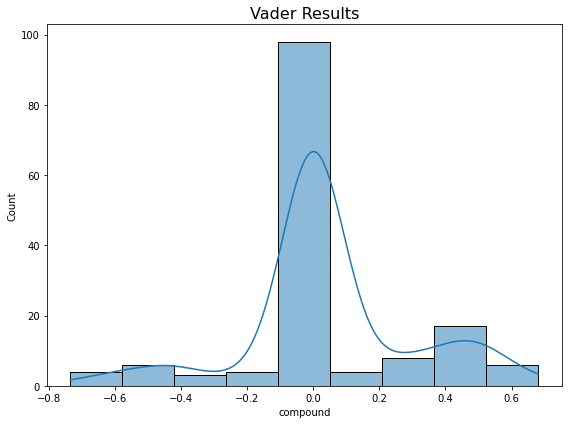

In [68]:
fig, ax = plt.subplots( figsize=[8,6])

ax = sns.histplot(
    x=df.compound,
    kde=True
)

plt.title('Vader Results', fontsize=16)

plt.tight_layout()
plt.show()

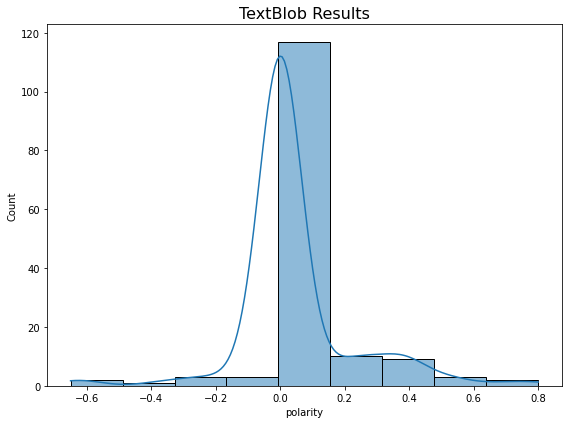

In [69]:
fig, ax = plt.subplots( figsize=[8,6])

ax = sns.histplot(
    x=df.polarity,
    kde=True
)

plt.title('TextBlob Results', fontsize=16)

plt.tight_layout()
plt.show()

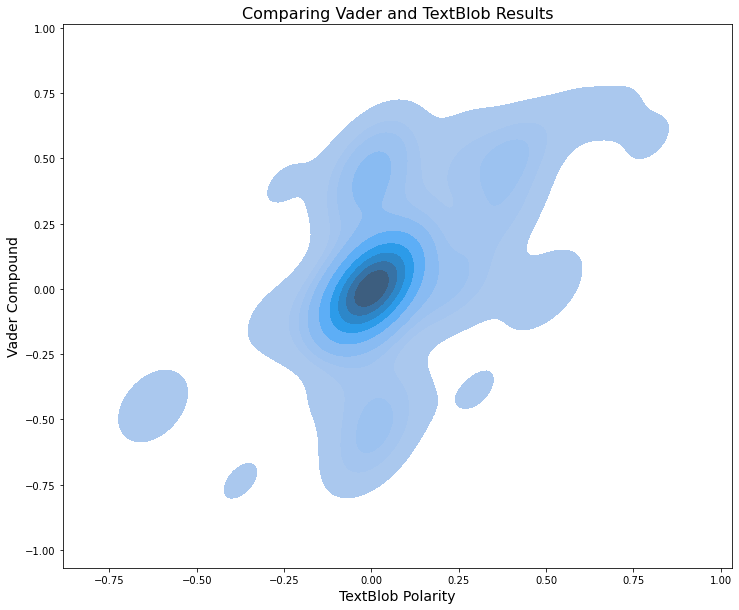

In [70]:
# Vader x TextBlob

fig, ax = plt.subplots(figsize=[12,10])

ax = sns.kdeplot(
    x='polarity',
    y='compound',
    shade=True,
    data=df
)

plt.ylabel('Vader Compound', fontsize=14)
plt.xlabel('TextBlob Polarity', fontsize=14)

plt.title('Comparing Vader and TextBlob Results', fontsize=16)

plt.show()

In [71]:
# Creating Classification Cols
# Vader Compound
df['vader_classification'] = np.where(df.compound>.25,'positive','neutral')
df['vader_classification'] = np.where(df.compound<-.25,'negative',df.vader_classification)

# TextBlob Polarity
df['textblob_classification'] = np.where(df.polarity>.05,'positive','neutral')
df['textblob_classification'] = np.where(df.polarity<-.05,'negative',df.textblob_classification)

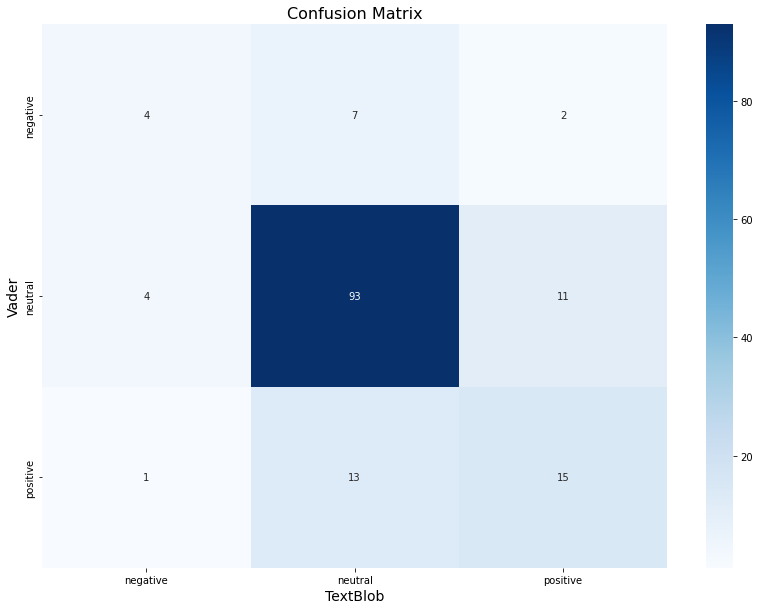

In [72]:
# Creating sample data
y_true = list(df.vader_classification)
y_pred = list(df.textblob_classification)

# Create data frame from sample data
df_plot = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})

# Create confusion matrix from data frame
matrix = pd.crosstab(df_plot['y_true'], df_plot['y_pred'], rownames=['True'], colnames=['Predicted'], margins=False)

# Plot the confusion matrix using seaborn
plt.figure(figsize=[14,10])
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix',fontsize=16)
plt.xlabel('TextBlob',fontsize=14)
plt.ylabel('Vader',fontsize=14)
plt.show()

del df_plot